In [1]:
from sympt import *
import sympy as sp

In [2]:
spin = RDBasis('sigma', 2)
s0, sx, sy, sz = spin.basis

In [3]:
Delta = sp.symbols('Delta', positive=True, real=True)
Omega = sp.symbols('Omega', positive=True, real=True)
delta = sp.symbols('delta', positive=True, real=True)

H0 = Delta * sz.matrix + delta * sy.matrix
HD =  Omega * sx.matrix 

In [4]:
U, D = H0.diagonalize()

In [5]:
sp.series(D[0], delta, 0, 3)

-delta**2/(2*Delta) - Delta + O(delta**3)

In [6]:
spin.project(sp.simplify(U.inv() * HD * U)).expand()

-I*Delta*Omega*sigma_1/delta + Omega*sqrt(Delta**2 + delta**2)*sigma_2/delta

In [7]:
sp.series(group_by_operators(spin.project(sp.simplify(U.inv() * HD * U)).expand())[sy], delta, 0, 3)

Omega*delta/(2*Delta) + Delta*Omega/delta + O(delta**3)

In [12]:
import qutip as qt
import numpy as np

In [196]:
Delta_val = 1
Omega_val = 0.4
delta_val = 0.2

omega = 1 + delta_val**2/ (2 * Delta_val)

delta_rabi = 0
Rabi_freq = np.sqrt(Omega_val**2 + delta_rabi**2)
T_max = 2 * np.pi / Rabi_freq


H0_qt = Delta_val / 2 * qt.sigmaz() + delta_val / 2 * qt.sigmay()
HD_qt = [[Omega_val * qt.sigmax(), lambda t: np.cos(omega * t) ]]

# |0><0| projector
P_0 = qt.ket2dm(qt.basis(2, 0))
P_0
P_1 = qt.ket2dm(qt.basis(2, 1))

In [197]:
Ts = np.linspace(0, 2*T_max, 100)

evolved = qt.sesolve([H0_qt] + HD_qt, qt.basis(2, 0), Ts, e_ops=[P_1])

0.9997229356978696


(-0.1, 1.1)

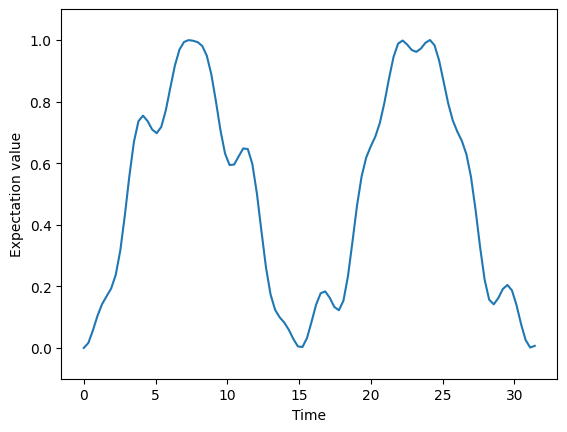

In [198]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(Ts, np.real(evolved.expect[0]), label='|0><0|')
ax.set_xlabel('Time')
ax.set_ylabel('Expectation value')
print(np.max(np.real(evolved.expect[0])))

ax.set_ylim(-0.1, 1.1)

In [2]:
import numpy as np


hbar_value = 1.054571817e-34  # Planck constant over 2π, in J·s
e_constant = 1.602176634e-19  # Elementary charge magnitude, in C
e_charge = -e_constant        # Electron charge, in C
m_electron = 9.10938356e-31   # Mass of a free electron, in kg
m_si = 0.19 * m_electron  # Effective mass of electron in silicon conduction band


In [40]:
g_factors = np.linspace(1.993, 2)

B_0 = 90 * 1e-3  # Tesla, magnetic field strength

Deltas = e_constant * g_factors / (2 * m_electron) * B_0

# MHz
delta_skyrmion_freq = np.array([365, 412]) * 1e6  # Hz
delta_g_factor = delta_skyrmion_freq * 2 * np.pi * (2 * m_electron) / (e_constant * B_0)

delta_g_factor_stark = 10 * 1e6 * 2 * np.pi * (2 * m_electron) / (e_constant * 1.5)  # Hz

In [49]:
delta_g_factor_stark * e_constant / (2 * m_electron) * B_0 / (2 * np.pi * 1e6)  # MHz

0.6000000000000001

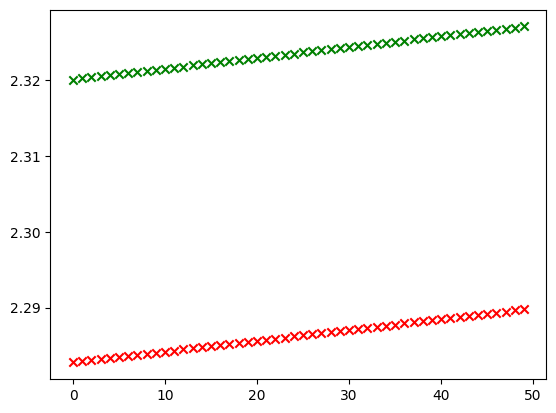

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Ns = np.arange(len(g_factors))

#ax.scatter(Ns, g_factors)\

ax.scatter(Ns, g_factors + delta_g_factor[0], marker='x', color='red', label='g factor + min_skyrmion')
ax.scatter(Ns, g_factors + delta_g_factor[1], marker='x', color='green', label='g factor + max_skyrmion')
# erorbar = delta_g_factor_stark
# ax.errorbar(Ns, g_factors, yerr=delta_g_factor_stark, fmt='o', color='blue', label='g factor + Stark shift')

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# latex rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 12,
    "figure.titlesize": 12,
    "lines.linewidth": 1.5,
    "axes.grid": False,
    "grid.alpha": 0.5,
    "figure.figsize": (8, 6),
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "savefig.bbox": 'tight',
    "savefig.format": 'pdf',
    "savefig.transparent": True,
})

In [2]:
hbar_value = 1.054571817e-34  # Planck constant over 2π, in J·s
e_constant = 1.602176634e-19  # Elementary charge magnitude, in C
e_charge = -e_constant        # Electron charge, in C
m_electron = 9.10938356e-31   # Mass of a free electron, in kg
m_si = 0.19 * m_electron  # Effective mass of electron in silicon conduction band

g_factors = np.random.uniform(1.993, 2, size=20)
B_0 = 90e-3  # Tesla, magnetic field strength
omegas_z = e_constant * g_factors / (2 * m_electron) * B_0

Delta_z_stark = 10e6 # 10 MHz at 1.5 T
Delta_g_stark = Delta_z_stark * 2 * np.pi * 2 * m_electron / (e_constant * 1.5)  # MHz
Delta_omega_z = e_constant * Delta_g_stark / (2 * m_electron) * B_0

In [6]:
2 * Delta_omega_z / (2 * np.pi * 1e6)  # MHz

1.2000000000000002

Text(0, 0.5, 'Qubit frequency (GHz)')

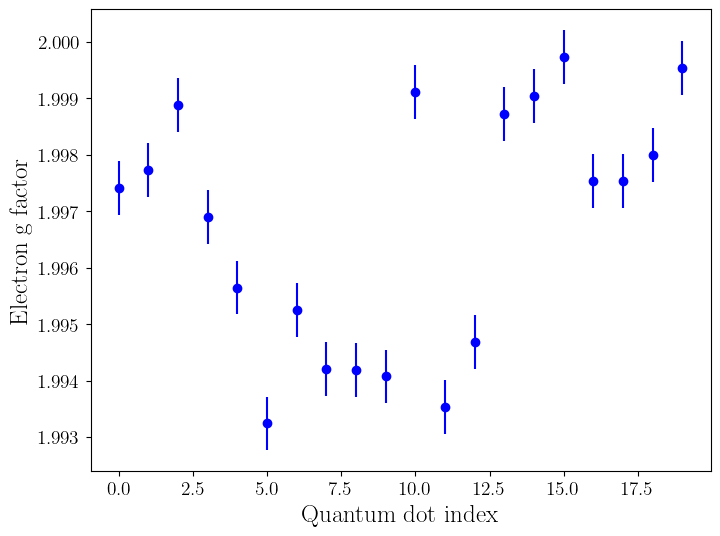

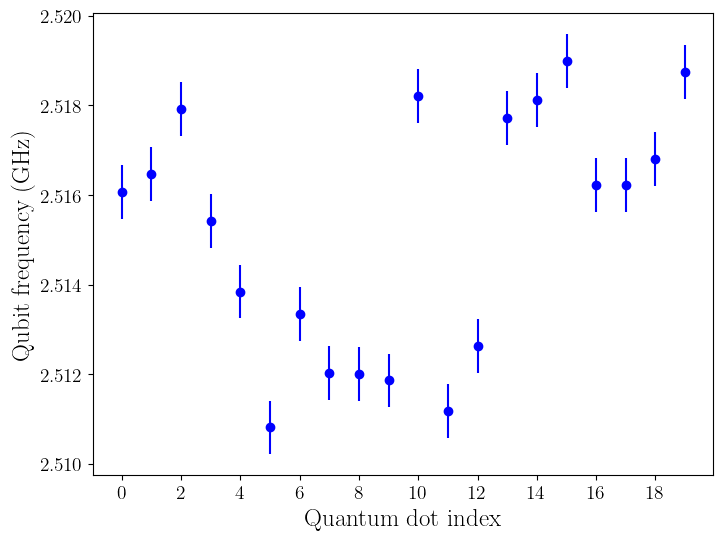

In [ ]:
fig, ax = plt.subplots()
Ns = np.arange(len(g_factors))
# Error bars for the g-factor where the error is the Stark shift, put caps on the error bars
ax.errorbar(Ns, g_factors, yerr=Delta_g_stark, fmt='o', color='blue', label='g factor + Stark shift')
ax.set_xlabel('Quantum dot index')
ax.set_ylabel('Electron g factor')

fig, ax = plt.subplots()
ax.errorbar(Ns, omegas_z / (2*np.pi * 1e9), yerr=Delta_omega_z / (2*np.pi*1e9), fmt='o', color='blue', label='Zeeman splitting + Stark shift')
ax.set_xticks(Ns[::2], labels=[f'${i}$' for i in Ns[::2]])
ax.set_xlabel('s')
ax.set_ylabel('Qubit frequency (GHz)')

In [20]:
Omega_rabi = sp.symbols('Omega_rabi', positive=True, real=True)
detuning = 1.2e6
amplitude = 0.01  # Amplitude of the Rabi drive in J

sp.solve(Omega_rabi**2 / (detuning**2 + Omega_rabi**2) - amplitude, Omega_rabi)[0] / 1e3  # Convert to MHz

120.604537831105

In [1]:
import sympy as sp

In [8]:
Jx = sp.Matrix([
    [0, 0, sp.sqrt(3), 0],
    [0, 0, 0, sp.sqrt(3)],
    [sp.sqrt(3), 0, 0, 2],
    [0, sp.sqrt(3), 2, 0],
])

Jy = sp.Matrix([
    [0, 0, -sp.I * sp.sqrt(3), 0],
    [0, 0, 0, sp.I * sp.sqrt(3)],
    [sp.I * sp.sqrt(3), 0, 0, -2 * sp.I],
    [0, -sp.I * sp.sqrt(3), 2 * sp.I, 0],
])

display(Jx)
Jy

Matrix([
[      0,       0, sqrt(3),       0],
[      0,       0,       0, sqrt(3)],
[sqrt(3),       0,       0,       2],
[      0, sqrt(3),       2,       0]])

Matrix([
[        0,          0, -sqrt(3)*I,         0],
[        0,          0,          0, sqrt(3)*I],
[sqrt(3)*I,          0,          0,      -2*I],
[        0, -sqrt(3)*I,        2*I,         0]])

In [12]:
Jx * Jy + Jy * Jx

Matrix([
[          0,            0,           0, -4*sqrt(3)*I],
[          0,            0, 4*sqrt(3)*I,            0],
[          0, -4*sqrt(3)*I,           0,            0],
[4*sqrt(3)*I,            0,           0,            0]])

In [13]:
from sympt import *
import sympy as sp

In [15]:
omega = sp.symbols('omega', positive=True, real=True)
Delta = sp.symbols('Delta', positive=True, real=True)
g = RDSymbol('g', positive=True, real=True, order = 1)
E0 = sp.symbols('E_0', real=True)
omega_D = sp.symbols('omega_D', positive=True, real=True)

a = BosonOp('a')
ad = Dagger(a)

Spin = RDBasis('sigma', 2)
s0, sx, sy, sz = Spin.basis

H0 = omega * ad * a + sp.Rational(1, 2) * Delta * sz
V = g * (ad + a) * sx

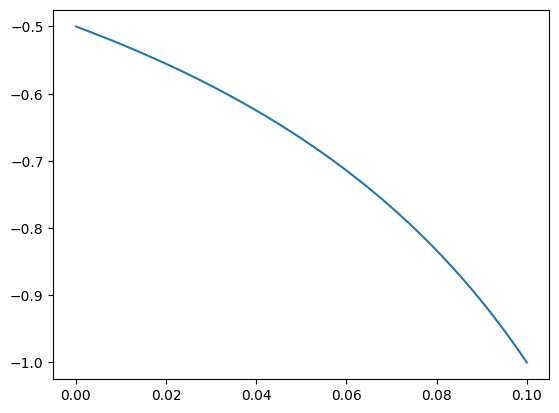

In [40]:
import numpy as np

epsilon = np.linspace(0, 0.1, 1000)
E0 = 0.1
E1 = 0.2

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(epsilon,  (E1 - E0)/(epsilon - E1))


In [1]:
import numpy as np



In [2]:
hbar_value = 1.054571817e-34  # Planck constant over 2π, in J·s
e_constant = 1.602176634e-19  # Elementary charge magnitude, in C
e_charge = -e_constant        # Electron charge, in C
m_electron = 9.10938356e-31   # Mass of a free electron, in kg
m_si = 0.19 * m_electron  # Effective mass of electron in silicon conduction band


In [11]:
B = 1

(e_constant * B / (m_electron)) / (2 * np.pi * 1e9)  # Convert to MHz

27.99249030715251